# Problem 8.5.1 (Vending Machines).

Let us look at the data vending-machines.dat of Ex. 7.1.1 from the softdrink vending machines.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model as sm
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
import sys
sys.path.insert(0, '../')

from utils import diagnostic_plots

In [3]:
df = pd.read_csv('./vending-machines.dat', sep='\t')
df.head()

,Time,Volume,Distance,Town
0,16.68,7,560,San Diego
1,11.50,3,220,San Diego
2,12.03,3,340,San Diego
3,14.88,4,80,San Diego
4,13.75,6,150,San Diego


In [4]:
pltorig = plt.rcParams['figure.figsize']
pltorig

[6.4, 4.8]

#### (a) Fit Model with Original Variables

In [5]:
mod = smf.ols(formula="Time ~ Volume", data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           8.22e-15
Time:                        15:26:36   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3208      1.371      2.422      0.024       0.484       6.157
Volume         2.1762      0.124     17.546      0.000       1.920       2.433
==============================================================================
Omnibus:                        2.383   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.037
Skew:                           0.388   Prob(JB):                        0.595
Kurtosis:                       3.627   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# some stats
x_bounds = [df['Volume'].min(), df['Volume'].max()]
y_bounds = [df['Time'].min(), df['Time'].max()]

x_bounds, y_bounds

([2, 30], [8.0, 79.24])

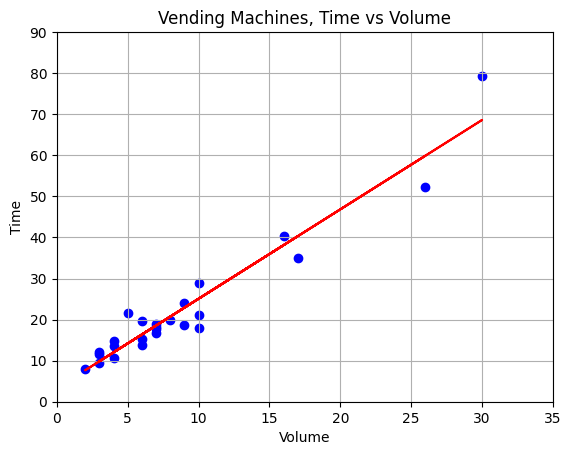

In [7]:
# plot data
plt.close()
plt.xlim([0, 35])
plt.ylim([0, 90])
plt.scatter(df['Volume'], df['Time'], color="blue")
plt.grid()

plt.xlabel('Volume')
plt.ylabel('Time')

plt.title('Vending Machines, Time vs Volume')

# add regression line
plt.plot(df['Volume'], mod.predict(), color='red')

plt.show()

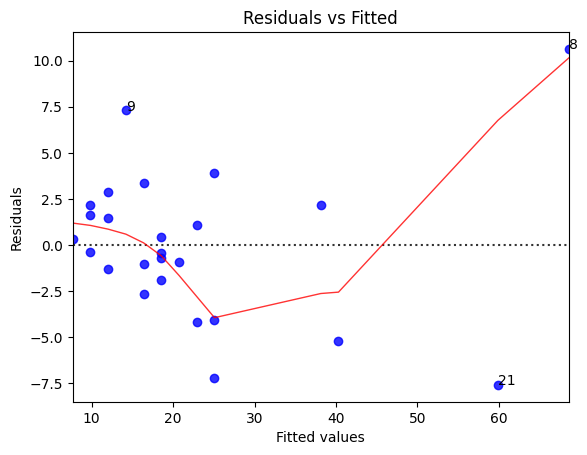

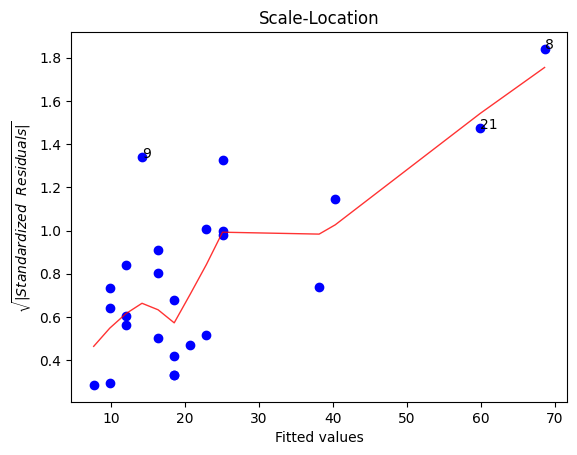

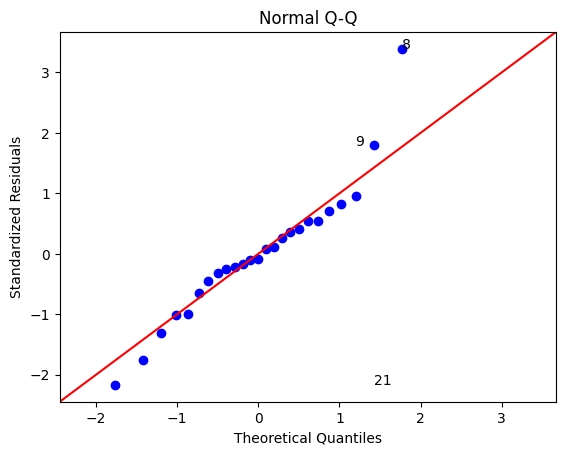

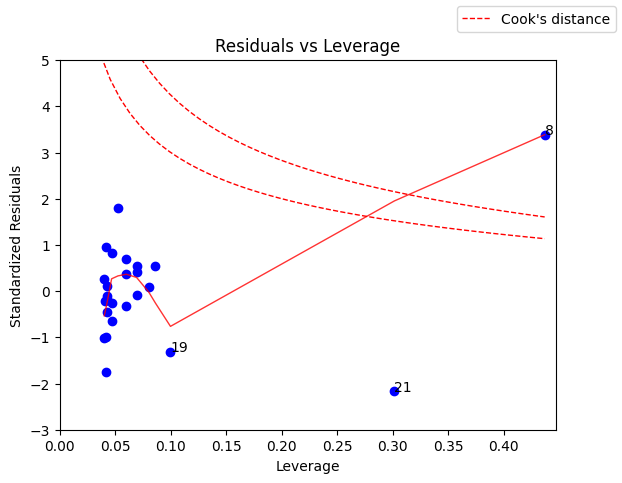

In [8]:
# residuals analysis
diagnostic_plots(X=df['Volume'], y=df['Time'], model_fit=mod)

REMARKS:
1.  Tukey-Anscombe plot shows outlier with index $i=9$ which affects smooth curve.
    In the simulation it is visible that the original curve is extreme.\
    => The expected value of the residuals cannot be constant.
2.  Scale-location plot shows a clear upwards trend.
    In the simulation it is visible that the original curve is extreme.\
    => The scattering of the residuals is not constant.
3.  q-q plot shows a slightly heavy tail and the outlier with index $i=9$ is again obvious.\
    => Residuals are not normally distributed.

CONCLUSION: The fit is not satisfactory. Try transformations of response and explanatory variable.

####   (c) Fit Model with Transformed Variables

In [9]:
# always try log transformation first
df['Timelog'] = np.log10(df['Time'])
df['Volumelog'] = np.log10(df['Volume'])
df['Volumesq'] = np.sqrt(df['Volume'])

## 1. Variant - log(Time) = β0 + β1 · log(Volume) + ε

In [10]:
mod1 = smf.ols(formula="Timelog ~ Volumelog", data=df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Timelog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     196.7
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           9.25e-13
Time:                        15:26:36   Log-Likelihood:                 30.169
No. Observations:                  25   AIC:                            -56.34
Df Residuals:                      23   BIC:                            -53.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6539      0.047     13.817      0.000       0.556       0.752
Volumelog      0.7457      0.053     14.026      0.000       0.636       0.856
==============================================================================
Omnibus:                        0.327   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.333
Skew:                           0.232   Prob(JB):                        0.847
Kurtosis:                       2.678   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

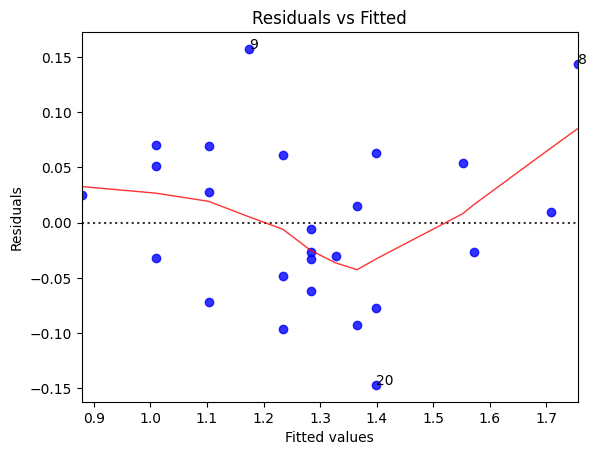

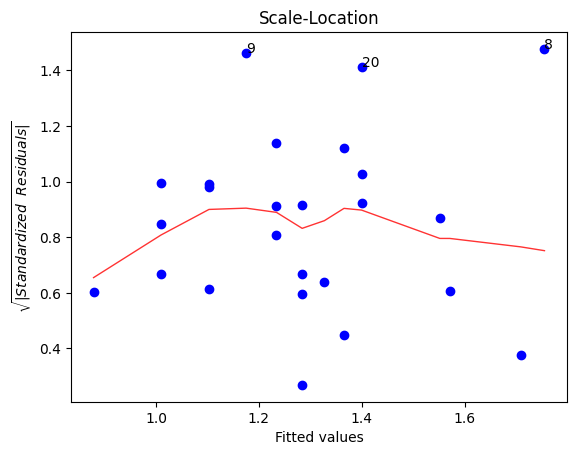

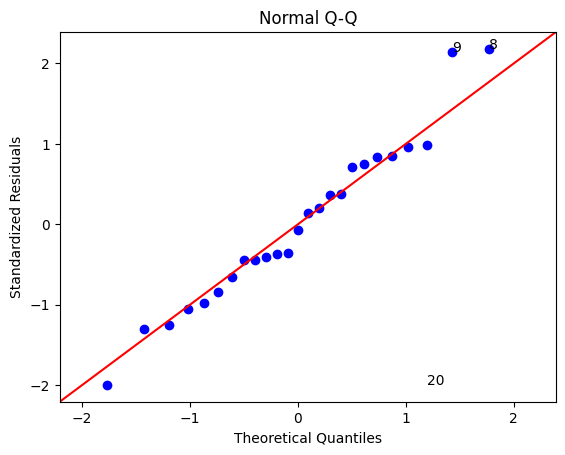

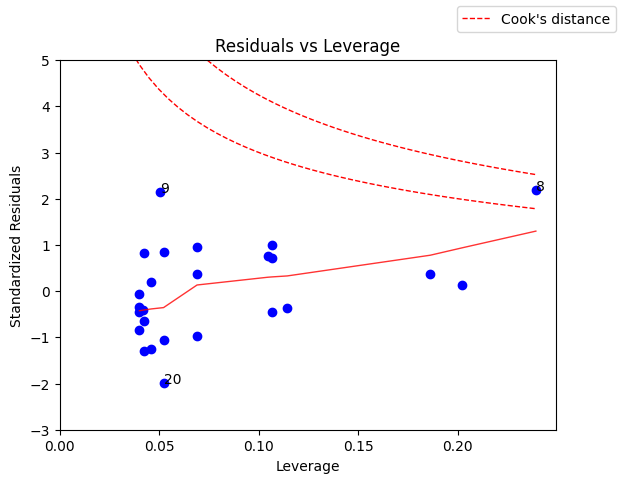

In [14]:
diagnostic_plots(X=df['Volumelog'], y=df['Timelog'], model_fit=mod1)

## Variant 2 - log(Time) = β0 + β1 · √Volume + ε

In [16]:
mod2 = smf.ols(formula="Timelog ~ Volumesq", data=df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Timelog   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     247.8
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           8.27e-14
Time:                        15:27:37   Log-Likelihood:                 32.783
No. Observations:                  25   AIC:                            -61.57
Df Residuals:                      23   BIC:                            -59.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6752      0.041     16.495      0.000       0.590       0.760
Volumesq       0.2177      0.014     15.743      0.000       0.189       0.246
==============================================================================
Omnibus:                        1.745   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.072
Skew:                           0.507   Prob(JB):                        0.585
Kurtosis:                       2.994   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'data' is not defined

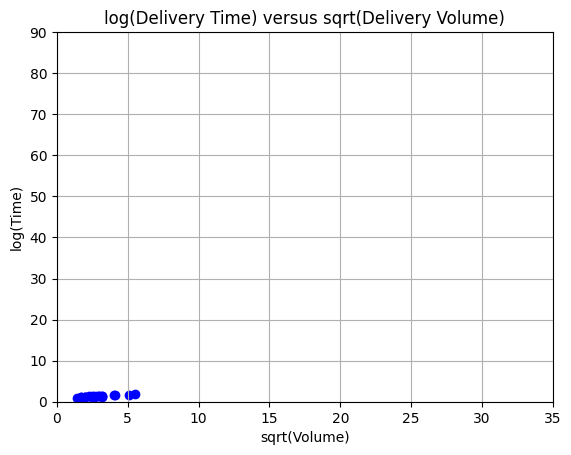

In [13]:
plt.close()
plt.xlim([0, 35])
plt.ylim([0, 90])
plt.scatter(df['Volumesq'], df['Timelog'], color="blue")
plt.grid()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('log(Delivery Time) versus sqrt(Delivery Volume)')
plt.xlabel('sqrt(Volume)')
plt.ylabel('log(Time)')
#   add best model
plt.plot(data.Volumesq, mod2.predict(), color='red')
plt.show()